In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [52]:
df=pd.read_csv("d:/pydoc/kddcup99.csv")
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [53]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


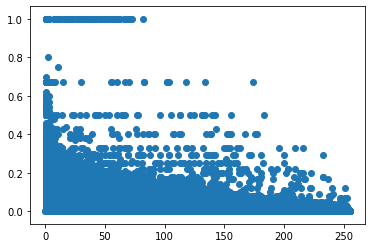

In [54]:
plt.scatter(df['dst_host_count'],df['dst_host_srv_diff_host_rate'])
plt.show()

In [55]:
dfi=df.iloc[:,[31,36]]
dfi.head(1)

,dst_host_count,dst_host_srv_diff_host_rate
0,9,0.0


In [56]:
dfi.shape


(494020, 2)

In [57]:
from sklearn.cluster import KMeans

In [58]:
km=KMeans(n_clusters=2)
km.fit(dfi)
df['Class']=km.predict(dfi)

In [59]:
df['Class'].value_counts()

0    443332
1     50688
Name: Class, dtype: int64

(50688, 43)
(443332, 43)


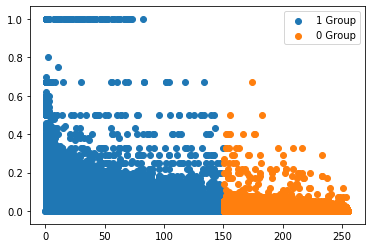

In [60]:
for a in df['Class'].unique():
    dfn=df.query("Class=="+str(a))
    print(dfn.shape)
    plt.scatter(dfn['dst_host_count'],dfn['dst_host_srv_diff_host_rate'],
               label=str(a)+" Group")
plt.legend()
plt.show()

In [61]:
def getcluster(n):
    km=KMeans(n_clusters=n)
    km.fit(dfi)
    df['Class']=km.predict(dfi)
    cn=km.cluster_centers_
    print("Centroids ", cn)
    for a in df['Class'].unique():
        dfn=df.query("Class=="+str(a))
        print(dfn.shape)
        plt.scatter(dfn['dst_host_count'],dfn['dst_host_srv_diff_host_rate'],
               label=str(a)+" Group")
        
    for a in df['Class'].unique():
        plt.scatter(cn[a][0],cn[a][1], marker='*', s=200, color='black',
               label=str(a)+" Centroid")
    
    plt.legend()
    plt.show()

Centroids  [[2.54781619e+02 9.08393538e-05]
 [1.77821971e+01 8.32701131e-02]
 [8.26935175e+01 3.08445212e-02]
 [1.62005782e+02 1.88790450e-02]]
(30950, 43)
(15642, 43)
(10723, 43)
(436705, 43)


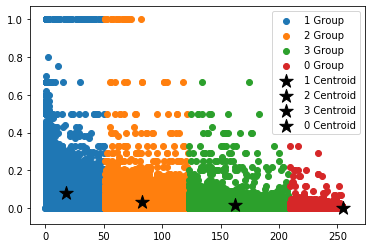

In [62]:
getcluster(4)

In [63]:
dfi=df.iloc[:,[31,36]]
dfo=df.iloc[:,0]

In [64]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(dfi,dfo)
reg.score(dfi,dfo)

0.00010693271734008025

In [65]:
reg.coef_

array([  0.09571703, -45.05166952])

In [66]:
reg.intercept_

26.029046356863702

In [67]:
len(str(reg.intercept_))

18

Text(0.5, 1.0, 'Test data: 443332 points x1 clusters.')

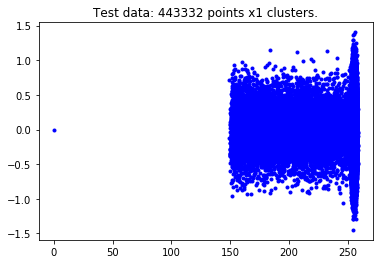

In [68]:
#fuzzy cmeans clustering
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[dfn['dst_host_count'],dfn['dst_host_srv_diff_host_rate']]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(443332) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(443332) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(443332) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 443332 points x1 clusters.')

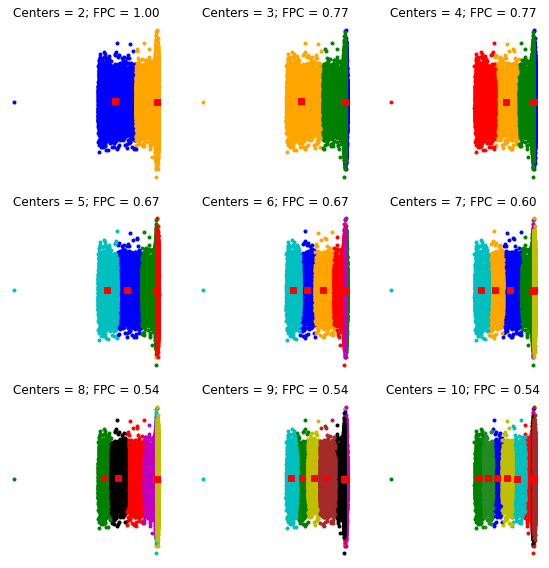

In [69]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Text(0, 0.5, 'Fuzzy partition coefficient')

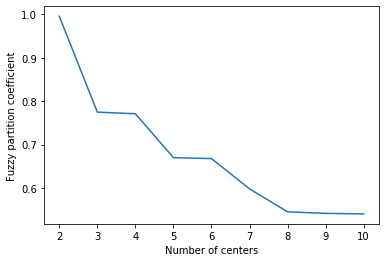

In [70]:
#The fuzzy partition coefficient (FPC)
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


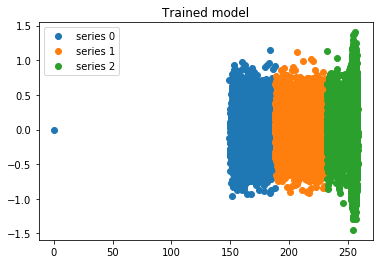

In [71]:
#classifying the  new data
#bulding the model
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

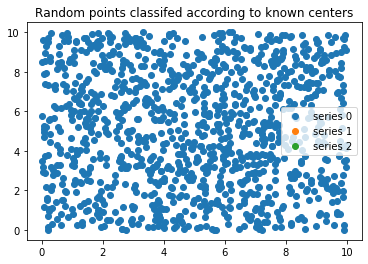

In [72]:
#predictin
# Generate uniformly sampled data spread across the range [0, 10] in x and y
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
ax3.legend()

plt.show()


In [73]:
#prediction score
fpc

0.3735180252494344

In [74]:
import pandas as pd
import pickle

data = pd.read_csv('d:\pydoc\kddcup_two99.csv')

#Slicing Data
slice1 = data.iloc[0:399,:]
slice2 = data.iloc[400:800,:]
#slice3 = data.iloc[801:1200,:]
#slice4 = data.iloc[1201:,:]
slice3 = data.iloc[801:,:]

def mapper(data):
    
    mapped = []
    
    for index,row in data.iterrows():
        
         mapped.append((row['dst_host_count'],row['dst_host_srv_diff_host_rate']))
        
    return mapped


map1 = mapper(slice1)
map2 = mapper(slice2)
map3 = mapper(slice3)
#map4 = mapper(slice4)

shuffled = {
    1.0: [],
    2.0: [],
    3.0: [],
    4.0: [],
    5.0: [],
    6.0: [],
    7.0: [],
    8.0: [],
    9.0: [],
    10.0: [],
    11.0: [],
    12.0: [],
    13.0: [],
    14.0: [],
    15.0: [],
    16.0: [],
    17.0: [],
    18.0: [],
    19.0: [],
    20.0: [],
    21.0: [],
    22.0: [],
    23.0: [],
    24.0: [],
    25.0: [],
    26.0: [],
    27.0: [],
    28.0: [],
    29.0: [],
    30.0: [],
    31.0: [],
    32.0: [],
    33.0: [],
    34.0: [],
    35.0: [],
    36.0: [],
    37.0: [],
    38.0: [],
    39.0: [],
    40.0: [],
    41.0: [],
    42.0: [],
    43.0: [],
    44.0: [],
    45.0: [],
    46.0: [],
    47.0: [],
    48.0: [],
    49.0: [],
    50.0: [],
    51.0: [],
    52.0: [],
    53.0: [],
    54.0: [],
    55.0: [],
    56.0: [],
    57.0: [],
    58.0: [],
    59.0: [],
    60.0: [],
    61.0: [],
    62.0: [],
    63.0: [],
    64.0: [],
    65.0: [],
    66.0: [],
    67.0: [],
    68.0: [],
    69.0: [],
    70.0: [],
    71.0: [],
    72.0: [],
    73.0: [],
    74.0: [],
    75.0: [],
    76.0: [],
    77.0: [],
    78.0: [],
    79.0: [],
    80.0: [],
    81.0: [],
    82.0: [],
    83.0: [],
    84.0: [],
    85.0: [],
    86.0: [],
    87.0: [],
    88.0: [],
    89.0: [],
    90.0: [],
    91.0: [],
    92.0: [],
    93.0: [],
    94.0: [],
    95.0: [],
    96.0: [],
    97.0: [],
    98.0: [],
    99.0: [],
    100.0: [],
    101.0: [],
    102.0: [],
    103.0: [],
    104.0: [],
    105.0: [],
    106.0: [],
    107.0: [],
    108.0: [],
    109.0: [],
    110.0: [],
    111.0: [],
    112.0: [],
    113.0: [],
    114.0: [],
    115.0: [],
    116.0: [],
    117.0: [],
    118.0: [],
    119.0: [],
    120.0: [],
    121.0: [],
    122.0: [],
    123.0: [],
    124.0: [],
    125.0: [],
    126.0: [],
    127.0: [],
    128.0: [],
    129.0: [],
    130.0: [],
    131.0: [],
    132.0: [],
    133.0: [],
    134.0: [],
    135.0: [],
    136.0: [],
    137.0: [],
    138.0: [],
    139.0: [],
    140.0: [],
    141.0: [],
    142.0: [],
    143.0: [],
    144.0: [],
    145.0: [],
    146.0: [],
    147.0: [],
    148.0: [],
    149.0: [],
    150.0: [],
    151.0: [],
    152.0: [],
    153.0: [],
    154.0: [],
    155.0: [],
    156.0: [],
    157.0: [],
    158.0: [],
    159.0: [],
    160.0: [],
    161.0: [],
    162.0: [],
    163.0: [],
    164.0: [],
    165.0: [],
    166.0: [],
    167.0: [],
    168.0: [],
    169.0: [],
    170.0: [],
    171.0: [],
    172.0: [],
    173.0: [],
    174.0: [],
    175.0: [],
    176.0: [],
    177.0: [],
    178.0: [],
    179.0: [],
    180.0: [],
    181.0: [],
    182.0: [],
    183.0: [],
    184.0: [],
    185.0: [],
    186.0: [],
    187.0: [],
    188.0: [],
    189.0: [],
    190.0: [],
    191.0: [],
    192.0: [],
    193.0: [],
    194.0: [],
    195.0: [],
    196.0: [],
    197.0: [],
    198.0: [],
    199.0: [],
    200.0: [],
    201.0: [],
    202.0: [],
    203.0: [],
    204.0: [],
    205.0: [],
    206.0: [],
    192.0: [],
    193.0: [],
    194.0: [],
    195.0: [],
    196.0: [],
    197.0: [],
    198.0: [],
    199.0: [],
    200.0: [],
    201.0: [],
    202.0: [],
    203.0: [],
    204.0: [],
    205.0: [],
    206.0: [],
    207.0: [],
    208.0: [],
    209.0: [],
    210.0: [],
    211.0: [],
    212.0: [],
    213.0: [],
    214.0: [],
    215.0: [],
    216.0: [],
    217.0: [],
    218.0: [],
    219.0: [],
    220.0: [],
    221.0: [],
    222.0: [],
    223.0: [],
    224.0: [],
    225.0: [],
    226.0: [],
    227.0: [],
    228.0: [],
    229.0: [],
    230.0: [],
    231.0: [],
    232.0: [],
    233.0: [],
    234.0: [],
    235.0: [],
    236.0: [],
    237.0: [],
    238.0: [],
    239.0: [],
    240.0: [],
    241.0: [],
    242.0: [],
    243.0: [],
    244.0: [],
    245.0: [],
    246.0: [],
    247.0: [],
    248.0: [],
    249.0: [],
    250.0: [],
    251.0: [],
    252.0: [],
    253.0: [],
    254.0: [],
    255.0: []   
    
    
}
#,map4
for i in [map1,map2,map3]:
    for j in i:
        shuffled[j[0]].append(j[1])

file= open('shuffled.pkl','ab')
pickle.dump(shuffled,file)
file.close()

print("Data has been mapped. Now, run reducer.py to reduce the contents in shuffled.pkl file.")

Data has been mapped. Now, run reducer.py to reduce the contents in shuffled.pkl file.


In [75]:
data.head(5)

,dst_host_count,dst_host_srv_diff_host_rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,9,0.0,NaN,NaN,NaN,NaN,NaN
1,19,0.0,NaN,NaN,NaN,NaN,NaN
2,29,0.0,NaN,NaN,NaN,NaN,NaN
3,39,0.0,NaN,NaN,NaN,NaN,NaN
4,49,0.0,NaN,NaN,NaN,NaN,NaN


In [76]:
#Mapper reducer
import pickle

file= open('shuffled.pkl','rb')
shuffled = pickle.load(file)

def reduce(shuffled_dict):
    reduced = {}
    
    for i in shuffled_dict: 
        
        reduced[i] = sum(shuffled_dict[i])/len(shuffled_dict[i])
    
    return reduced


final = reduce(shuffled)

print("Average  dst_host_count in different classes of dst_host_srv_diff_host_rate")
for i in final:

    print(i,':',final[i])

Average  dst_host_count in different classes of dst_host_srv_diff_host_rate
3.0 : 0.8845000000000001
4.0 : 0.6939622641509429
5.0 : 0.5767157584683352
6.0 : 0.4973704866562018
7.0 : 0.4039195979899498
8.0 : 0.4233333333333334


In [77]:
# Homomorphic Encryption
import pandas as pd
from utils import dataload
from model import vanillaModel, homomorphicEncryptionModel

cci_data = pd.read_csv(r'd:\pydoc\kddcup_two99.csv')

cci_data['dst_host_count'] = cci_data['dst_host_srv_diff_host_rate'].astype(int)
cci_data['dst_host_srv_diff_host_rate'] = cci_data['dst_host_srv_diff_host_rate'].astype(int)



In [78]:
cci_data.head(200)

,dst_host_count,dst_host_srv_diff_host_rate,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,0,NaN,NaN,NaN,NaN,NaN
1,0,0,NaN,NaN,NaN,NaN,NaN
2,0,0,NaN,NaN,NaN,NaN,NaN
3,0,0,NaN,NaN,NaN,NaN,NaN
4,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
195,0,0,NaN,NaN,NaN,NaN,NaN
196,0,0,NaN,NaN,NaN,NaN,NaN
197,0,0,NaN,NaN,NaN,NaN,NaN
198,0,0,NaN,NaN,NaN,NaN,NaN


In [79]:
input_cols = list(cci_data.columns)[:1]
output_cols = list(cci_data.columns)[1]


x_data, y_data, x_data_shortened, y_data_shortened, X_enc, y_enc, H_enc = dataload(cci_data, input_cols, output_cols)

# https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf
# source for use of orthogonal matrices and invertible matrices transformation for homomorophic encryption

# Test case 1: Vanilla model (benchmark credit rating/scoring model for default prediction)
vanillaModel(x_data, y_data)
# Test case 2: Homomorphic encryption model running on encrypted data
homomorphicEncryptionModel(X_enc, y_enc, x_data, H_enc)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Himanshu\\AppData\\Local\\Temp\\tmporppsv5s', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D633541198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflo

In [80]:
X_enc

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [81]:
y_enc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
x_data

,dst_host_count
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [83]:
H_enc

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[ 0.15503661, -0.0982819 ,  0.08998705, ..., -0.06590587,
      

In [84]:
print(homomorphicEncryptionModel(X_enc, y_enc, x_data, H_enc))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Himanshu\\AppData\\Local\\Temp\\tmpb6u4sa2b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D633B5DEB8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflo

In [85]:
homomorphicEncryptionModel(X_enc, y_enc, x_data, H_enc)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Himanshu\\AppData\\Local\\Temp\\tmpx2uyr9r8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D633B03400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflo

In [86]:
vanillaModel(x_data,y_data)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Himanshu\\AppData\\Local\\Temp\\tmp5d55gbv4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002D61415BEF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflo

In [87]:
#pso algorithm woth optimization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


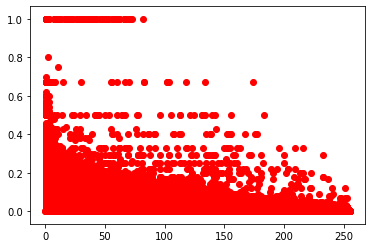

In [88]:
df1=pd.read_csv("d:\pydoc\kddcup99.csv")   #Importing data
col1 = df1['dst_host_count']
col2 = df1['dst_host_srv_diff_host_rate']
x1 = col1.as_matrix()
y1_ = col2.as_matrix()
plt.scatter(x1,y1_,color='red')   #Plotting data

In [89]:
#PSO parameters
c1 = 0.1  #PSO hyperparametre
c2 =0.1
P = 30   #Number of particles
N = 500 #Number of Iterations

In [90]:
def swarm(P=10):  #Define partilces
    Wpc = tf.Variable(tf.random_normal([P])) #Current value
    bpc = tf.Variable(tf.random_normal([P]))
    fitness_pc = tf.Variable(tf.zeros([P]))
    
    Wpbest= tf.Variable(tf.random_normal([P]))
    bpbest= tf.Variable(tf.random_normal([P]))
    fitness_pbest = tf.Variable(tf.zeros([P]))
    
    Wglobal= tf.Variable(tf.random_normal([1]))
    bglobal= tf.Variable(tf.random_normal([1]))
    fitness_global = tf.Variable(tf.zeros([1]))
    
    V_W = tf.Variable(tf.zeros([P]))   #Particle velocity
    V_b = tf.Variable(tf.zeros([P]))
    return Wpc,bpc,Wpbest,bpbest,Wglobal,bglobal,V_W,V_b,fitness_pc,fitness_pbest,fitness_global

Wpc,bpc,Wpbest,bpbest,Wglobal,bglobal,V_W,V_b,fitness_pc,fitness_pbest,fitness_global =swarm(P)
print(Wglobal)

<tf.Variable 'Variable_17:0' shape=(1,) dtype=float32_ref>


In [91]:
x = tf.placeholder(tf.float32)
W = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
i = tf.placeholder(tf.int32)
y_ = tf.placeholder(tf.float32)

In [92]:
#Update particles
V_W_update = V_W[i].assign(V_W[i]+(Wpbest[i] - Wpc[i])*c1*np.random.random() +(Wglobal[0] - Wpc[i])*c2*np.random.random() )
V_b_update = V_b[i].assign(V_b[i]+(bpbest[i] - bpc[i])*c1*np.random.random() +(bglobal[0] - bpc[i])*c2*np.random.random() )
Wp_update = Wpc[i].assign(V_W[i]+Wpc[i])
bp_update = bpc[i].assign(V_b[i]+bpc[i])

#Cost
y = Wpc[i]*x + bpc[i]
y_best = Wglobal[0]*x + bglobal[0]
error= tf.reduce_mean(tf.square(y- y_))
#Update fitness
update_fitness_pc = fitness_pc[i].assign(error)
update_fitness_pbest = fitness_pbest[i].assign(fitness_pc[i])
update_fitness_global = fitness_global[0].assign(fitness_pc[i])
initialize_fitness_global = fitness_global[0].assign(tf.reduce_min(fitness_pbest))

update_Wpbest = Wpbest[i].assign(Wpc[i])
update_bpbest = bpbest[i].assign(bpc[i])
update_Wglobal = Wglobal[0].assign(Wpc[i])
update_bglobal = bglobal[0].assign(bpc[i])

def f1():return [Wpbest[i].assign(Wpc[i]),bpbest[i].assign(bpc[i]),fitness_pbest[i].assign(fitness_pc[i])]
def f2():return [Wpbest[i],bpbest[i],fitness_pbest[i]]
pbest_update= tf.cond(tf.less(fitness_pc[i], fitness_pbest[i]), f1, f2)

def f3():return [Wglobal[0].assign(Wpc[i]),bglobal[0].assign(bpc[i]),fitness_global[0].assign(fitness_pc[i])]
def f4():return [Wglobal[0],bglobal[0],fitness_global[0]]
global_update= tf.cond(tf.less(fitness_pc[i], fitness_global[0]), f3, f4)

In [93]:
start_time = time.time()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run([V_W_update,V_b_update],feed_dict={i:0})
    sess.run([Wp_update,bp_update],feed_dict={i:0})
   
    for k in range(P):     #Initialize particles
        sess.run([update_fitness_pc],feed_dict={i:k,x:x1,y_:y1_})
        sess.run([update_fitness_pbest],feed_dict={i:k})
    sess.run([initialize_fitness_global])
    print("Particle fitness:",sess.run(fitness_pc))
    print("Global fitness:",sess.run(fitness_global))
    
    for j in range(N):      #Loop over N iterations
        for k in range(P):  #Loop over P particles
            
            sess.run([V_W_update,V_b_update],feed_dict={i:k})
            sess.run([Wp_update,bp_update],feed_dict={i:k})
            sess.run([update_fitness_pc],feed_dict={i:k,x:x1,y_:y1_})
            
           
            sess.run([pbest_update],feed_dict={i:k}) 
           
            sess.run([global_update],feed_dict={i:k})
                        
            
        if j%50== 0:
            print("Iteration:",j)    
    print("Particle best fitness:",sess.run(fitness_pbest)) 
    print("Global best fitness:",sess.run(fitness_global)) 
    print("Global best particle:",sess.run([Wglobal,bglobal]))  
    
    yfinal =sess.run([y_best],feed_dict={x:x1,y_:y1_}) #storing values
print("Time taken:", (time.time() - start_time))

Particle fitness: [  3078.0925  21506.275    8056.1187   1369.6143  16330.151   20550.002
   9357.64    26661.854    2880.1814    799.6071  91778.7     15546.557
 140734.6     15458.2       541.9298 257610.84      633.3695   3541.0522
   1128.0326  30296.16     2019.2893  19763.748   37265.426   39790.957
   1925.1257   5359.793   24641.566   48119.688   70896.4     46983.15  ]
Global fitness: [541.9298]
Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Iteration: 250
Iteration: 300
Iteration: 350
Iteration: 400
Iteration: 450
Particle best fitness: [0.12720545 0.01137228 0.01843586 0.01136115 0.14755408 0.12822025
 0.6571096  0.4774169  0.00931224 0.01612585 0.142405   0.12098159
 1.3345205  0.02171733 0.05816621 0.04825845 0.00193023 0.17985652
 0.01094579 0.20122631 0.17285018 0.7452247  0.05318718 0.49417186
 0.1032415  0.2858505  0.09635018 0.44474357 1.5168306  0.04639529]
Global best fitness: [0.00193023]
Global best particle: [array([-0.00067024], dtype=fl

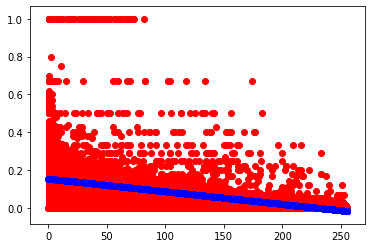

In [94]:
plt.scatter(x1,y1_,color='red')  #Plot original line
plt.scatter(x1,yfinal,color='blue')   #Plot fitted line

In [3]:
from random import randint,choice
from math import ceil,log

getVar = lambda searchList, ind: [searchList[i] for i in ind]
find = lambda searchList, elem: [[i for i, x in enumerate(searchList) if x == e] for e in elem]
mod = lambda n,m: n % m

def set_up_cipher(): #Use this to change your cipher
    alpha = '1234567890qwertyuiop[]asdfghjkl;zxcvbnm,.!@#$%^&*()_+-=-{}:<>|QWERTYUIOPASDFGHJKLZXCVBNM ~`?°'
    cipher = "".join([list(alpha)[randint(0,len(list(alpha))-1)] for i in range(5000)])
    f = open('d:/pydoc/kddcup_two99.csv','r+')
    f.truncate()
    f = open('d:/pydoc/kddcup_two99.csv','r+')
    f.write(cipher)

def baseExpansion(n,c,b):
    i = len(n)
    base10 = sum([pow(c,i-k-1)*n[k] for k in range(i)])
    j = int(ceil(log(base10 + 1,b)))
    baseExpanded = [mod(base10//pow(b,j-p),b) for p in range(1,j+1)]
    return baseExpanded

cipher = open('d:/pydoc/kddcup_two99.csv').read()+'\n'
def wordEncrypt(word):
    cipherWord = find(cipher,list(word))
    keys = [randint(5001,7000), randint(2,5000)]
    encryptedWord = baseExpansion(list(map(choice, cipherWord)),keys[0],keys[1])
    encryptedWord.extend(keys)
    return list(map(int,encryptedWord))
    
def wordDecrypt(encryptedList):
    encryptedWord = encryptedList[0:len(encryptedList)-2]
    keys = encryptedList[len(encryptedWord):len(encryptedList)]
    decryptedList = map(int,baseExpansion(encryptedWord, keys[1], keys[0]))
    return "".join(getVar(cipher,decryptedList))

def mainEandD(): #Interactive 
    print('Please Enter e for Encryption or d for Decryption')
    print(' ')
    counter = True
    counter2 = True
    while counter:
        while counter2:
            func = input('Encrypt or Decrypt: ')
            print(' ')
            if func.lower() == 'e':
                print('Would You Like to Encrypt a Word or a Text File?')
                print(' ')
                while True:
                    fOrw = input('F/W: ')
                    print(' ')
                    if fOrw.lower().rstrip() == 'w':
                        word = input('Enter Word: ')
                        print(' ')
                        print('Encrypting...')
                        print(' ')
                        print('The Encrypted Word is: {}'.format(wordEncrypt(word)))
                        print(' ')
                        counter2 = False
                        break
                    elif fOrw.lower().rstrip() == 'f':
                        while True:
                            try:
                                wordInput = input('Enter Filename: ')
                                print(' ')
                                print('Encrypting...')
                                print(' ')
                                word = open(wordInput, 'r+')
                                encryptedWord = wordEncrypt(word.read())
                                word.close()
                                word = open(wordInput, 'r+')
                                word.truncate()
                                word.write(str(encryptedWord))
                                word.close()
                                print('The Text File Has Been Encrypted')
                                print(' ')
                                counter2 = False
                                break
                            except:
                                print(' ')
                                print('Enter a Valid Filename or Type')
                                print(' ')
                        break
                    else:
                        print('Please enter f for File or w for Word')
                        print(' ')
            elif func.lower() == 'd':
                print('Would You Like to Decrypt a Word or Text File?')
                print(' ')
                while True:
                    fOrw = input('F/W: ')
                    print(' ')
                    if fOrw.lower().rstrip() == 'w':
                        while True:
                            try:
                                encryptedWord = eval(input('Enter Encrypted Word: ').rstrip())
                                print(' ')
                                print('Decrypting...')
                                print(' ')
                                print('The Decrypted Word is: {}'.format(wordDecrypt(encryptedWord)))
                                print(' ')
                                counter2 = False
                                break
                            except:
                                print(' ')
                                print('You did not enter a the correct type')
                                print(' ')
                        break
                    elif fOrw.lower().rstrip() == 'f':
                        while True:
                            try:
                                wordInput = input('Enter Filename: ')
                                print(' ')
                                print('Decrypting...')
                                print(' ')
                                word = open(wordInput, 'r+')
                                decryptedWord = wordDecrypt(eval(word.read()))
                                word.close()
                                word = open(wordInput, 'r+')
                                word.truncate()
                                word.write(str(decryptedWord))
                                word.close()
                                print('The Text File Has Been Decrypted')
                                print(' ')
                                counter2 = False
                                break
                            except:
                                print(' ')
                                print('You did not enter a the correct type or Filename')
                                print(' ')
                        break
                    else:
                        print('Please enter f for File or w for Word')
                        print(' ')
            else:
                print('Please Enter e for Encryption and d for Decryption')
                print(' ')
        print('Would you like to Encrypt or Decrypt another word or file?')
        print(' ')
        while True:
            tryAgain = input('Y/N: ')
            print(' ')
            if tryAgain.lower().rstrip() == 'n':
                print('Thank You!')
                print(' ')
                counter = False
                break
            elif tryAgain.lower().rstrip() == 'y':
                counter2 = True
                break
            else:
                print('Please Enter Either Y for Yes or N for No')
                print(' ')
                
#mainEandD()

In [4]:
set_up_cipher()


In [ ]:
mainEandD()
